<a href="https://colab.research.google.com/github/PrathamSoni4473/Machine-Learning/blob/main/DecisionTree_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import tree
import graphviz
from sklearn.preprocessing import Normalizer

In [ ]:
df = pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
x = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Survived'],axis='columns')
y = df['Survived']

le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

x['Age'] = x['Age'].fillna(x['Age'].median())
print(x.isnull().sum())

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 100, test_size = 0.3)

clf = tree.DecisionTreeClassifier()
model = clf.fit(x_train,y_train)

prediction = clf.predict(x_test)
print('Training Accuracy : ',accuracy_score(y_train,clf.predict(x_train)))
print('Testing Accuracy : ',accuracy_score(y_test,clf.predict(x_test)))

Training Accuracy :  0.9823434991974318
Testing Accuracy :  0.7686567164179104


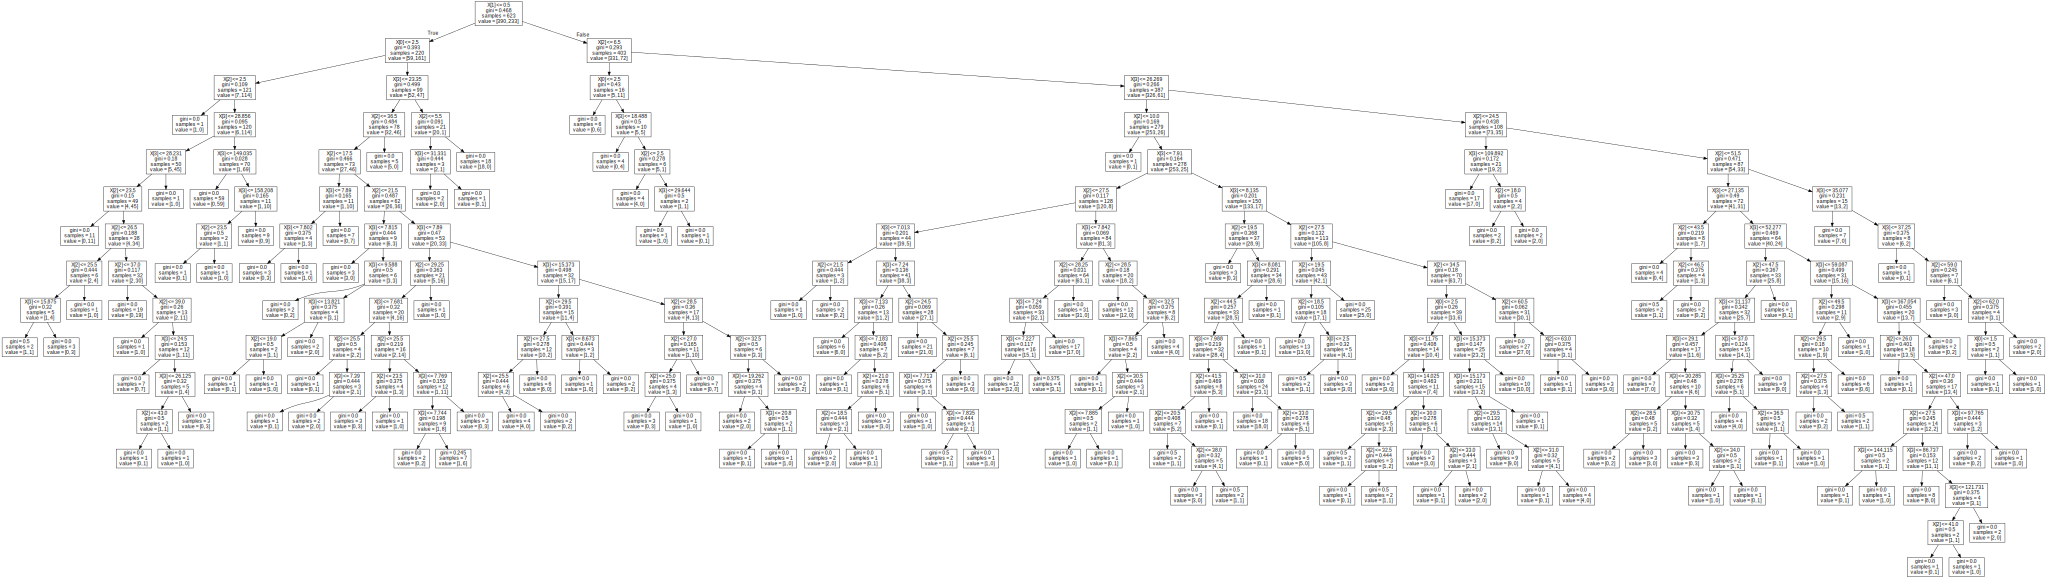

In [ ]:
dot_data = tree.export_graphviz(clf)

graph = graphviz.Source(dot_data) 
graph